<a href="https://colab.research.google.com/github/mcova100-jpg/Machine_Learning/blob/main/Housing_Prices_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Prices Data Set

Illustrates regression and simple decision trees

*   Part 1: Loading, understanding, and visualizing the dataset
*   Part 2: Linear regression
*   Part 3: Simple decision tree



---

Session 1, Intro to AI/ML, Hult International Business School
Michael de la Maza

Version 1.1 (December 16, 2023)

(Adapted from "Machine Learning Using Python" by Daneyal Anis and "Approaching (Almost) Any Machine Learning Problem" by Abishek Thakur)

**Part 1: Loading, understanding, and visualizing the dataset**

In [1]:
## Options for coding
# 1. Recreate
# 2. Copy
# 3. Hybrid
# 4. Watch
# 5. Neighbor

In [2]:
import pandas as pd


In [4]:
df = pd.read_csv('House Sales Values.csv')


In [ ]:
# Examine first 10 rows/instances/samples
print (df.head(10))

   YearBuilt  SquareFootage HouseType  NumCarGarage Fireplaces Pool  SalePrice
0       2002           3201      Semi           4.0        Yes   No  2000000.0
1       2017           3150      Semi           3.0        Yes   No  2000000.0
2       2000           2455  Detached           3.0         No   No   400000.0
3       2006           2560      Semi           4.0        Yes   No   400000.0
4       2005           3415       NaN           2.0         No  Yes  2000000.0
5       2015           3654      Town           3.0         No   No  2000000.0
6       2015           2071      Town           4.0         No   No   400000.0
7       2004           1310      Town           1.0        Yes  Yes   750000.0
8       2019           2646  Detached           1.0         No   No   400000.0
9       2001           1191      Town           2.0         No   No   750000.0


In [5]:
# Shape of dataset
print (df.shape)

# Is this intuitively correct? 1000 instances, 7 attributes (6 input, 1 output/target)

(1000, 7)


In [6]:
# Data types of attributes
print (df.dtypes)

#Note: 'int' and 'float' are typically treated as continuous attributes
# 'object' is typically treated as a categorical variable

YearBuilt          int64
SquareFootage      int64
HouseType         object
NumCarGarage     float64
Fireplaces        object
Pool              object
SalePrice        float64
dtype: object


In [7]:
# Descriptive statistics for df

pd.set_option('display.float_format', lambda x: '{:.0f}'.format(x)) # eliminate decimals

print(df.describe(include='all'))

# Are there missing values?

        YearBuilt  SquareFootage HouseType  NumCarGarage Fireplaces Pool  \
count        1000           1000       990           999        997  994   
unique        NaN            NaN         3           NaN          2    2   
top           NaN            NaN      Town           NaN         No  Yes   
freq          NaN            NaN       350           NaN        509  499   
mean         2010           2484       NaN             2        NaN  NaN   
std             6            857       NaN             1        NaN  NaN   
min          2000           1000       NaN             1        NaN  NaN   
25%          2004           1771       NaN             1        NaN  NaN   
50%          2009           2466       NaN             2        NaN  NaN   
75%          2015           3229       NaN             4        NaN  NaN   
max          2019           3992       NaN             4        NaN  NaN   

        SalePrice  
count         995  
unique        NaN  
top           NaN  
freq   

In [8]:
# Yes, there are missing values!
# Let's remove all instances which have missing values

total_count = df.isnull().sum().sort_values(ascending=False) # count missing values
print (total_count)

df = df.dropna()
print (df.shape)


HouseType        10
Pool              6
SalePrice         5
Fireplaces        3
NumCarGarage      1
SquareFootage     0
YearBuilt         0
dtype: int64
(980, 7)


In [ ]:
# Convert categorical attributes to labels (int64)

from sklearn.preprocessing import LabelEncoder
categorical_attr = ['HouseType', 'Fireplaces', 'Pool']

labelEncoder = LabelEncoder()

for attr in categorical_attr:
  df[attr] = labelEncoder.fit_transform(df[attr])

print(df.head())

print(df.dtypes) # compare to types above, note that 'object' attributes are now ints. Note HouseType in particular.


   YearBuilt  SquareFootage  HouseType  NumCarGarage  Fireplaces  Pool  \
0       2002           3201          1             4           1     0   
1       2017           3150          1             3           1     0   
2       2000           2455          0             3           0     0   
3       2006           2560          1             4           1     0   
5       2015           3654          2             3           0     0   

   SalePrice  
0    2000000  
1    2000000  
2     400000  
3     400000  
5    2000000  
YearBuilt          int64
SquareFootage      int64
HouseType          int64
NumCarGarage     float64
Fireplaces         int64
Pool               int64
SalePrice        float64
dtype: object


<Axes: xlabel='SalePrice', ylabel='Count'>

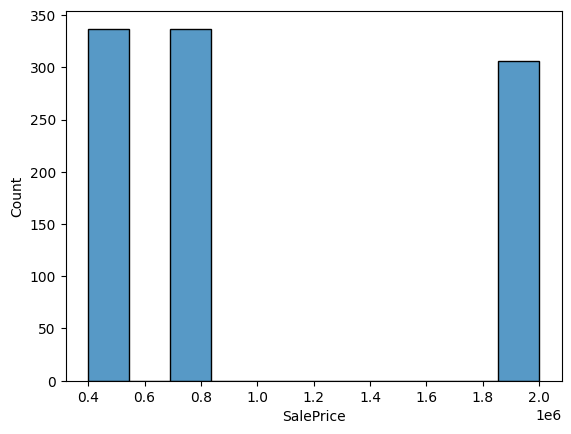

In [ ]:
# Visualize housing prices using a histogram
# Note that there are only three housing prices: $400K, $750K, $2M

import seaborn as sns

sns.histplot(df['SalePrice'])

<Axes: >

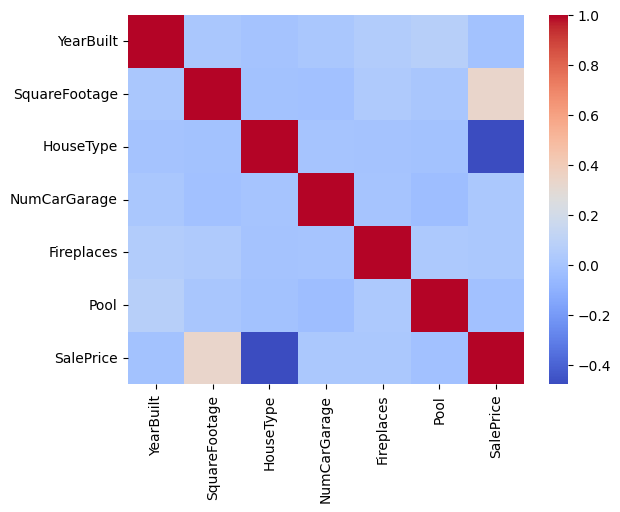

In [ ]:
# Calculate the correlation matrix

import matplotlib.pyplot as plt

correlation_matrix = df.corr()
f, ax = plt.subplots()

sns.heatmap(correlation_matrix, cmap="coolwarm")

# SalePrice and SquareFootage are positively correlated
# HouseType is negatively correlated but irrelevant because it is categorical

**Part 2: Linear Regression**

In [ ]:
# Split dataset into training and test set

from sklearn.model_selection import train_test_split

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=42)

In [ ]:
# Run linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

LR = LinearRegression()

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

# Predict on the training set
y_train_pred = LR.predict(X_train)

# Predict on the testing set
y_test_pred = LR.predict(X_test)

# Compute R2 score for the training set
r2_train = r2_score(y_train, y_train_pred)

# Compute R2 score for the testing set
r2_test = r2_score(y_test, y_test_pred)

print('R2 - training set:', round(r2_train, 2))
print('R2 - testing set:', round(r2_test, 2))

# What is the model? Coefficients
coefficients = LR.coef_
intercept = LR.intercept_

coefficients_dict = dict(zip(X.columns, LR.coef_))

# Print the dictionary
print('Coefficients', coefficients_dict)
print('Intercept:', intercept)

R2 - training set: 0.33
R2 - testing set: 0.38
Coefficients {'YearBuilt': -1976.1987799360768, 'SquareFootage': 252.63454850582718, 'HouseType': -384501.4235778884, 'NumCarGarage': 25392.597604454273, 'Fireplaces': 22202.792082477845, 'Pool': -55885.45267546779}
Intercept: 4700667.0436788695


**Part 3: Simple Decision Tree Regressor**





In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()

DTR.fit(X_train, y_train) # train tree on training set

y_train_pred = DTR.predict(X_train)
y_test_pred = DTR.predict(X_test) # test on testing set

print('Decison tree R2 - training set', r2_score(y_train, y_train_pred))
print('Decision tree R2 - testing set', r2_score(y_test, y_test_pred))


# Overfitting!!!!
#print (DTR.get_depth())


Decison tree R2 - training set 1.0
Decision tree R2 - testing set -0.04956098299570688


**Part 4: Depth limited Decision Tree**

Limit the depth of the tree to reduce overfitting.

Performance on the training set should decline while performance on the test set should increase.

In [ ]:
#Limit depth of tree to 3 to prevent overfitting!

DTR3 = DecisionTreeRegressor(max_depth=3)

DTR3.fit(X_train, y_train)

y_train_pred = DTR3.predict(X_train)
y_test_pred = DTR3.predict(X_test)

R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)

print('Decison tree maxdepth=3 R2 - training set', round(R2_train, 2))
print('Decision tree maxdepth=3 R2 - testing set', round(R2_test, 2))

#What a relief!


Decison tree maxdepth=3 R2 - training set 0.5
Decision tree maxdepth=3 R2 - testing set 0.42


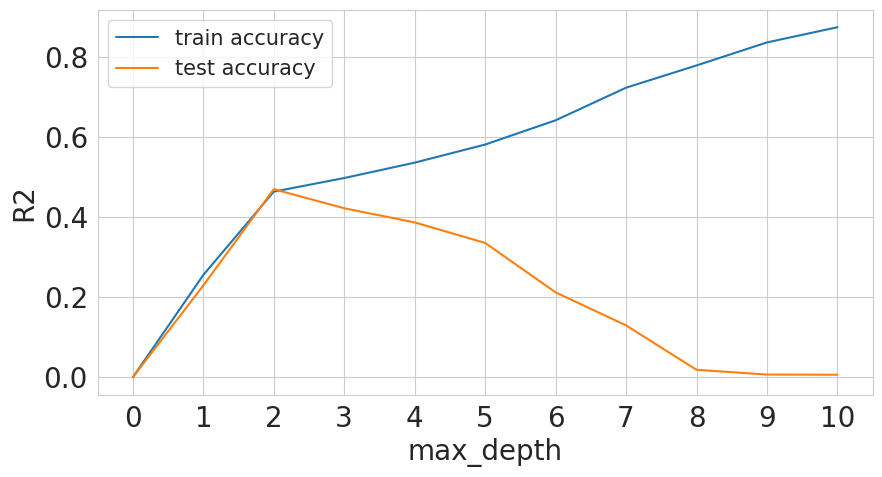

In [ ]:
# Search over maxdepth from 1 to 10 to find best performing decision tree

import matplotlib

R2_train_list = [0]
R2_test_list = [0]

for depth in range(1, 11):
  dtr = DecisionTreeRegressor(max_depth=depth)
  dtr.fit(X_train, y_train)

  y_train_pred = dtr.predict(X_train)
  y_test_pred = dtr.predict(X_test)

  R2_train = r2_score(y_train, y_train_pred)
  R2_test = r2_score(y_test, y_test_pred)

  R2_train_list.append(R2_train)
  R2_test_list.append(R2_test)


matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(R2_train_list, label="train accuracy")
plt.plot(R2_test_list, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 11, 1))
plt.xlabel("max_depth", size=20)
plt.ylabel("R2", size=20)
plt.show()

# What is optimal depth?

Decison tree maxdepth=3 R2 - training set 0.46
Decision tree maxdepth=3 R2 - testing set 0.47


[Text(0.5, 0.8333333333333334, 'HouseType <= 0.5\nsquared_error = 451199731593.318\nsamples = 882\nvalue = 1010204.082'),
 Text(0.25, 0.5, 'SquareFootage <= 2906.5\nsquared_error = 487953266782.374\nsamples = 293\nvalue = 1491296.928'),
 Text(0.125, 0.16666666666666666, 'squared_error = 536029692072.27\nsamples = 193\nvalue = 1244300.518'),
 Text(0.375, 0.16666666666666666, 'squared_error = 50176000000.0\nsamples = 100\nvalue = 1968000.0'),
 Text(0.75, 0.5, 'SquareFootage <= 3003.0\nsquared_error = 260506181522.594\nsamples = 589\nvalue = 770882.852'),
 Text(0.625, 0.16666666666666666, 'squared_error = 30578361094.587\nsamples = 410\nvalue = 581829.268'),
 Text(0.875, 0.16666666666666666, 'squared_error = 517778003183.422\nsamples = 179\nvalue = 1203910.615')]

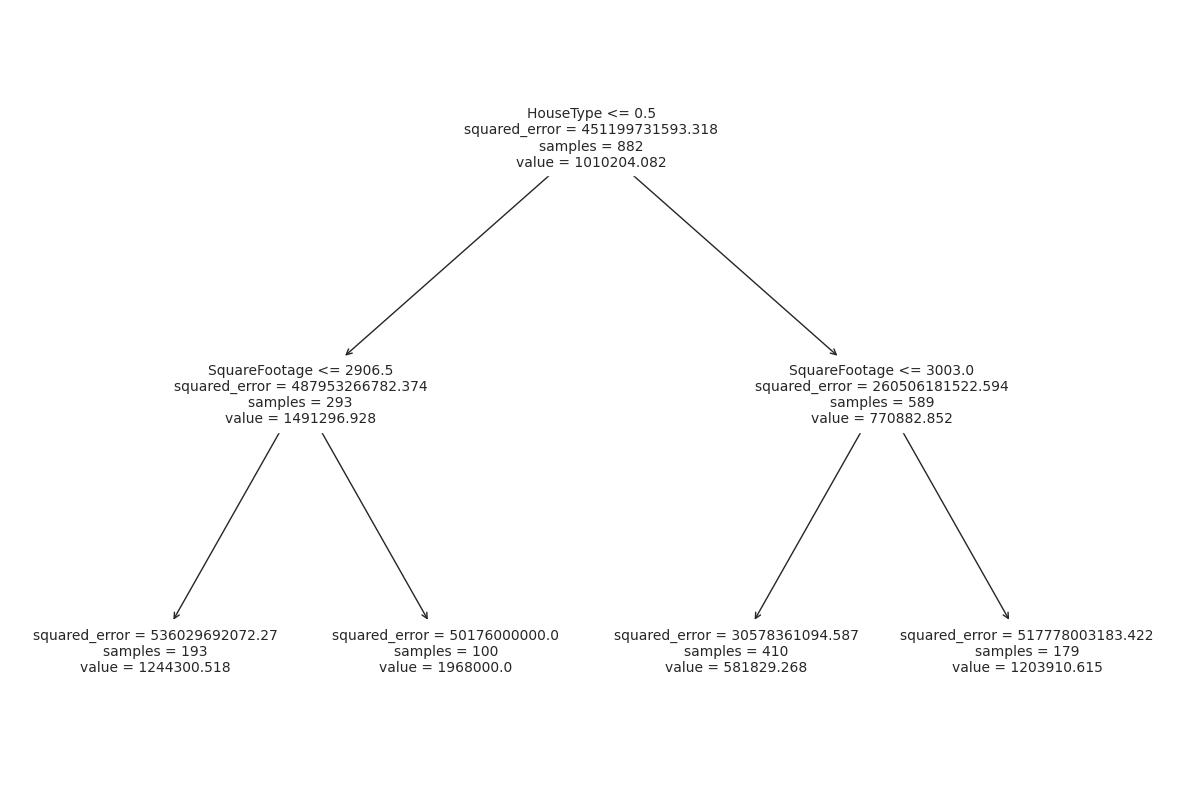

In [ ]:
# What is the tree?
# Optimal max_depth = 2
# This code is identical to DTR3 code above

DTR2 = DecisionTreeRegressor(max_depth=2)

DTR2.fit(X_train, y_train)

y_train_pred = DTR2.predict(X_train)
y_test_pred = DTR2.predict(X_test)

R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)

print('Decison tree maxdepth=3 R2 - training set', round(R2_train, 2))
print('Decision tree maxdepth=3 R2 - testing set', round(R2_test, 2))

from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(DTR2, feature_names = X.columns, fontsize=10)